## Pytorch tutorial

In [4]:
import torch.nn as nn
import torch

integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

one_d_tensor = torch.tensor([1,2,3,4])
print(f"`one_d tensor` is a {one_d_tensor.ndim}-d Tensor: {one_d_tensor}")

two_d_tensor = torch.tensor([[1,2,3,4],[21,22,23,24]])
print(f"`2_d tensor` is a {two_d_tensor.ndim}-d Tensor: {two_d_tensor}")

assert two_d_tensor.ndim == 2

count_to_100 = torch.tensor(range(100))

print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}") 

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732
`one_d tensor` is a 1-d Tensor: tensor([1, 2, 3, 4])
`2_d tensor` is a 2-d Tensor: tensor([[ 1,  2,  3,  4],
        [21, 22, 23, 24]])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [ ]:
#  In image processing and computer vision, we will use 4-d Tensors with dimensions corresponding to batch size, number of color channels, image height, and image width.
# what is a batch_size in a 4d tensor.
# create a 4d tensor Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256. 
# 10 images with channel of 3 and height and width = 256

fourd_array = torch.tensor([[ [[0 for _ in range(256)] for _ in range(256)] for _ in range(3)] for _ in range(10)])

assert fourd_array.shape == (10,3,256,256)


In [33]:
# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")


import numpy as np
# build a tensor of size 2,3
matrix_mult = torch.tensor([[ np.random.normal() for _ in range(3)]for _ in range(2)])
print(matrix_mult.shape)


c1: 76
c2: 76
torch.Size([2, 3])


In [ ]:
input = torch.tensor([[2,3]])
output = torch.tensor([[3.],[4.]])
print(input.shape,output.shape)

result = torch.matmul(matrix_mult.T,output)
print(result.shape)

#TODO: transpose a tensor ?
print(result.T.shape)

torch.Size([1, 2]) torch.Size([2, 1])
torch.Size([3, 1])
torch.Size([1, 3])


## NeuralNetworks in Pytorch

- use torch.nn.Module which serves as a base class for all NN modules in pytorch and thus provides a framework 
- Use a single Module to define our simple NN

In [15]:
import torch.nn as nn
import torch
class NeuralNetwork(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(NeuralNetwork,self).__init__()
        self.Weight = nn.Parameter(torch.randn(num_inputs,num_outputs)) # what are these initialization in neural network
        self.bias = nn.Parameter(torch.randn(num_outputs,1))    
    def forward(self,x):
        #z = torch.add(torch.matmul(self.Weight.T,x) ,self.bias) # i don't get how this size has gone to 3x3
        z = torch.matmul(self.Weight.T,x) + self.bias 
        print("output of the z matrix is ",z.shape)
        output = torch.sigmoid(z)
        return output
    
num_inputs= 2
num_outputs=3
neural_net = NeuralNetwork(num_inputs,num_outputs)
x_input =  torch.tensor([[2.],[1.]])
print(f"x_input shape: {x_input.shape}")
print(f"neural_net shape: {neural_net.Weight.shape}")
result = neural_net.forward(x_input)
#result = neural_net(torch.tensor([1,2]))
print(f"output shape: {result.shape}")
print(f"output result: {result}")
print(f" Dimensions of the bias is : {neural_net.bias.shape}")



x_input shape: torch.Size([2, 1])
neural_net shape: torch.Size([2, 3])
output of the z matrix is  torch.Size([3, 1])
output shape: torch.Size([3, 1])
output result: tensor([[0.2957],
        [0.4909],
        [0.1631]], grad_fn=<SigmoidBackward0>)
 Dimensions of the bias is : torch.Size([3, 1])


In [9]:
case1= nn.Parameter(torch.randn(num_outputs,1))  
case2 = nn.Parameter(torch.randn(num_outputs))  
print(case1.shape,case2.shape)

torch.Size([3, 1]) torch.Size([3])


In [21]:
import torch.nn as nn
import torch
class DenseLayer(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super().__init__()
        self.Weight = nn.Parameter(torch.randn(num_inputs,num_outputs)) # what are these initialization in neural network
        self.bias = nn.Parameter(torch.randn(num_outputs))    
    def forward(self,x):
        #z = torch.add(torch.matmul(self.Weight.T,x) ,self.bias) # i don't get how this size has gone to 3x3
        z = torch.matmul(x,self.Weight) + self.bias 
        print("output of the z matrix is ",z.shape)
        output = torch.sigmoid(z)
        return output
    
num_inputs= 2
num_outputs=3
neural_net = DenseLayer(num_inputs,num_outputs)
x_input =  torch.tensor([[1,2.]])
print(f"x_input shape: {x_input.shape}")
print(f"neural_net shape: {neural_net.Weight.shape}")
result = neural_net.forward(x_input)
#result = neural_net(torch.tensor([1,2]))
print(f"output shape: {result.shape}")
print(f"output result: {result}")
print(f" Dimensions of the bias is : {neural_net.bias.shape}")



y = neural_net(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")


x_input shape: torch.Size([1, 2])
neural_net shape: torch.Size([2, 3])
output of the z matrix is  torch.Size([1, 3])
output shape: torch.Size([1, 3])
output result: tensor([[0.4413, 0.3826, 0.8387]], grad_fn=<SigmoidBackward0>)
 Dimensions of the bias is : torch.Size([3])
output of the z matrix is  torch.Size([1, 3])
input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.4413, 0.3826, 0.8387]], grad_fn=<SigmoidBackward0>)


## Sequential API
Sequential API we can readily create neural networks by stacking together layers like building blocks from the pytorch and a single nn.Linear to define the network.

- what is the difference between Linear layer sigmoid and the prev layer with nn.Module utilising the matrix multiplication.
    - will this code and the prev code results in the same output?
    - 

In [ ]:
n_inputs = 2
n_outputs = 3
model = nn.Sequential(
    nn.Linear(n_inputs,n_outputs),
    nn.Sigmoid()
)

# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
y = neural_net(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

output of the z matrix is  torch.Size([1, 3])
input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.4413, 0.3826, 0.8387]], grad_fn=<SigmoidBackward0>)


In [10]:
class LinearLayerSigmoid(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super().__init__()
        self.linear=  nn.Linear(num_inputs,num_outputs) #defininig a linear layer
        self.activation= nn.Sigmoid() #defining an activation function
        
    def forward(self,inputs):
        linear=self.linear(inputs)
        outputs=self.activation(linear)
        return outputs
    

num_inputs= 2
num_outputs=3
ll_sigmoid = LinearLayerSigmoid(num_inputs,num_outputs)

#x_input = torch.tensor([2.,3.])
x_input = torch.tensor([[2.],[1.]])
output = ll_sigmoid.forward(x_input)
print(f"output shape: {output.shape}")
print(f"output result: {output}")
# how come ll_sigmoid.forward(x_input) and ll_sigmoid(x_input) results in the similar results?


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x1 and 2x3)

In [30]:
import torch
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward(torch.tensor(5))
print(y)

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)

tensor(9., grad_fn=<PowBackward0>)
dy_dx of y=x^2 at x=3.0 is:  tensor(30.)


In [37]:
x = torch.tensor(4.0, requires_grad=True)
y = x **3
y.backward(torch.tensor(5.0))
print(y)
res = x.grad
print(" res of the gradient is ", res)

tensor(64., grad_fn=<PowBackward0>)
 res of the gradient is  tensor(240.)


In [36]:
x.grad

tensor(48.)

find the min of L = (x-xf)^2

-  when do we keep requires_grad=True and when do we keep it false. 

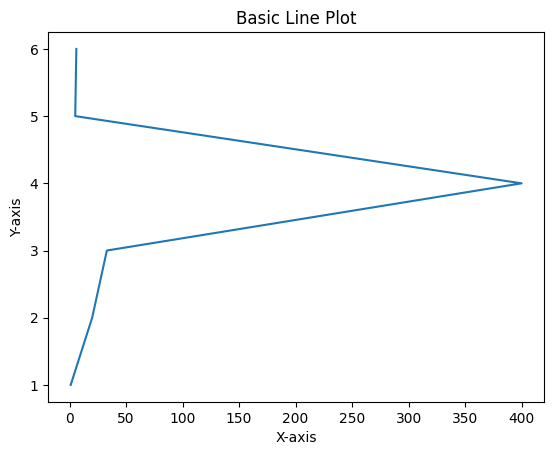

In [ ]:
import matplotlib.pyplot as plt


# how can i write the gradient descent for a func




plt.plot([1,20,33,400,5,6],[1,2,3,4,5,6])
plt.title('Basic Line Plot')  # Adds a title
plt.xlabel('X-axis')  # Adds an X-axis label
plt.ylabel('Y-axis')  # Adds a Y-axis label
plt.show()  # Displays the plot

- Pytorch and music generation with the RNN

In [40]:
!pip install comet_ml 
# 
import comet_ml
import torch
import torch.nn as nn
import torch.optim as optim

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet

COMET_API_KEY  = "HXfJSXP0syikMTTNHyr4cH7pc"




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\pantm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\pantm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Download the dataset
from mitdeeplearning import lab1
songs =lab1.load_training_data()

# Print one of the songs to inspect it in greater detail!
example_song = songs[100]
print("\nExample song: ")
print(example_song)

lab1.play_song(example_song)

C:\Users\pantm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 817 songs in text

Example song: 
X:32
T:Crabs in the Skillet
Z: id:dc-jig-26
M:6/8
L:1/8
K:G Dorian
D|G3 d2F|G2A B2c|d_ed cBA|dcB AGF|!
G3 d2F|G2A B2d|c=Bc fed|cAF F2:|!
d|gag gfe|fgf fed|cde fed|cAG G2d|!
gag gfe|fgf fed|cde fed|cAF F2:|!
D|G3 A3|B3 c3|d_ed cBA|dcB AGF|!
G3 A3|B3 d3|c=Bc fed|cAF F2:|!


In [4]:
# Join our list of song strings into a single string containing all songs
songs_joined = "\n\n".join(songs)

# Find all unique characters in the joined string
vocab = sorted(set(songs_joined))
print("There are", len(vocab), "unique characters in the dataset")

print(vocab)

There are 83 unique characters in the dataset
['\n', ' ', '!', '"', '#', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|']


## Vectorize the text

In [5]:
import numpy as np
### Define numerical representation of text ###

# Create a mapping from character to unique index.
# For example, to get the index of the character "d",
#   we can evaluate `char2idx["d"]`.
char2idx = {u: i for i, u in enumerate(vocab)}
# Create a mapping from indices to characters. This is
#   the inverse of char2idx and allows us to convert back
#   from unique index to the character in our vocabulary.
idx2char = np.array(vocab)

In [74]:
idx2char

array(['\n', ' ', '!', '"', '#', "'", '(', ')', ',', '-', '.', '/', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       '[', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
       'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', '|'], dtype='<U1')

Given a character or a sequence of characters, what is the most probable next character?
how can we achieve this?
    - 

In [6]:
## Vectorize the song string
def vectorize_string(string):
    vectorized_output = np.array([char2idx[char] for char in string])
    return vectorized_output

vectorized_songs = vectorize_string(songs_joined)

- what does an RNN require?
  - input sequence: an input sequence that we feed into our RNN 
  - target sequence: for each input sequence, which will be used in training the RNN to predict the next character

In [8]:

## what is this batch function trying to do.
import torch
def get_batch(vectorized_songs, seq_length, batch_size):
    # the length of the vectorized songs string
    n = vectorized_songs.shape[0] - 1
    # randomly choose the starting indices for the examples in the training batch
    idx = np.random.choice(n - seq_length, batch_size)

    '''TODO: construct a list of input sequences for the training batch'''
    input_batch = [vectorized_songs[i: i + seq_length] for i in idx]

    '''TODO: construct a list of output sequences for the training batch'''
    output_batch = [vectorized_songs[i+1: i + seq_length+1] for i in idx]

    # Convert the input and output batches to tensors
    x_batch = torch.tensor(input_batch, dtype=torch.long)
    y_batch = torch.tensor(output_batch, dtype=torch.long)

    return x_batch, y_batch

# Perform some simple tests to make sure your batch function is working properly!
test_args = (vectorized_songs, 10, 2)
x_batch, y_batch = get_batch(*test_args)
assert x_batch.shape == (2, 10), "x_batch shape is incorrect"
assert y_batch.shape == (2, 10), "y_batch shape is incorrect"
print("Batch function works correctly!")

Batch function works correctly!


C:\Users\pantm\AppData\Local\Temp\ipykernel_39656\369779558.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  x_batch = torch.tensor(input_batch, dtype=torch.long)


In [68]:
print ('{} ---- characters mapped to int ----> {}'.format(repr(songs_joined[:10]), vectorized_songs[:10]))
# check that vectorized_songs is a numpy array
assert isinstance(vectorized_songs, np.ndarray), "returned result should be a numpy array"

'X:1\nT:Alex' ---- characters mapped to int ----> [49 22 13  0 45 22 26 67 60 79]


In [9]:
x_batch, y_batch = get_batch(vectorized_songs, seq_length=5, batch_size=1)

for i, (input_idx, target_idx) in enumerate(zip(x_batch[0], y_batch[0])):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx.item()])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx.item()])))

Step   0
  input: 26 ('A')
  expected output: 31 ('F')
Step   1
  input: 31 ('F')
  expected output: 58 ('c')
Step   2
  input: 58 ('c')
  expected output: 31 ('F')
Step   3
  input: 31 ('F')
  expected output: 1 (' ')
Step   4
  input: 1 (' ')
  expected output: 59 ('d')


## LSTM Model
 - what is the embedding vector how do we create it? criteria of choosing the embedding_dim
 - 

In [21]:
import torch.nn as nn
class LSTMModel(nn.Module):
    def __init__(self,vocab_size,embedding_dim,hidden_size):
        super().__init__()
        self.hidden_size= hidden_size
        self.embedding = nn.Embedding(vocab_size,embedding_dim)
        self.lstm = nn.LSTM(embedding_dim,hidden_size,num_layers=2,batch_first=True)
        self.fc = nn.Linear(hidden_size,vocab_size)
        
    def init_hidden(self,batch_size,device):
        return (torch.zeros(2, batch_size, self.hidden_size).to(device),
                torch.zeros(2, batch_size, self.hidden_size).to(device))
        
    def forward(self, x, state=None, return_state=False):
        x = self.embedding(x)

        if state is None:
            state = self.init_hidden(x.size(0), x.device)
        out, state = self.lstm(x, state)  #what do we call this phenomena in python?

        out = self.fc(out)
        return out if not return_state else (out, state)

In [22]:
# Instantiate the model! Build a simple model with default hyperparameters. You
#     will get the chance to change these later.
vocab_size = len(vocab)
embedding_dim = 256 #how do we decide this embedding_dim ?
hidden_size = 1024
batch_size = 8

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMModel(vocab_size, embedding_dim, hidden_size).to(device)

# print out a summary of the model
print(model)

# if my LSTM model is bidirectional?

LSTMModel(
  (embedding): Embedding(83, 256)
  (lstm): LSTM(256, 1024, num_layers=2, batch_first=True)
  (fc): Linear(in_features=1024, out_features=83, bias=True)
)


In [23]:
# Test the model with some sample data

x, y = get_batch(vectorized_songs, seq_length=100, batch_size=32)
x = x.to(device)
y = y.to(device)

pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       torch.Size([32, 100])  # (batch_size, sequence_length)
Prediction shape:  torch.Size([32, 100, 83]) # (batch_size, sequence_length, vocab_size)


- why do we need to predict from the categorical distribution to sample.

In [24]:
sampled_indices = torch.multinomial(torch.softmax(pred[0], dim=-1), num_samples=1)
sampled_indices = sampled_indices.squeeze(-1).cpu().numpy()
sampled_indices

array([73, 37,  0, 71, 76, 69, 71, 33, 76, 46, 49, 77, 29, 62, 34,  0, 60,
       70, 18, 56, 80, 21, 66, 77, 47, 65, 54, 39, 27, 74,  1, 53, 65, 15,
       65, 14, 72, 50, 73, 37,  5, 46, 80, 67, 12,  2, 33, 58, 54, 68, 56,
       61,  8, 65, 53, 49, 38, 44, 27, 57, 64, 73, 35, 75, 73, 30, 45, 23,
       65, 51, 45, 22, 74, 49, 42, 69, 48,  1, 19, 26, 61,  9, 47, 26, 13,
        1, 81, 51, 34, 38, 57, 61, 79, 47, 47,  8, 68, 48, 68, 65],
      dtype=int64)

In [25]:
print("Input: \n", repr("".join(idx2char[x[0].cpu()])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices])))

Input: 
 "!\nBee2 fedB|egfe dBAF|DEFA dBAF|DEFD E3:|!\n\nX:357\nT:Tommy Peoples'\nZ: id:dc-reel-333\nM:C\nL:1/8\nK:B M"

Next Char Predictions: 
 "rL\npunpHuUXvDgI\neo6ay9kvVj^NBs ]j3j2qYrL'Uyl0!Hc^maf,j]XMSBbirJtrET<jZT:sXQnW 7Af-VA1 zZIMbfxVV,mWmj"


- this data as we see isn't predicting the correct next character, how can it be made better? Training the model! 

In [ ]:
### Defining the loss function ###

# '''TODO: define the compute_loss function to compute and return the loss between
#     the true labels and predictions (logits). '''
cross_entropy = nn.CrossEntropyLoss() # instantiates the function
def compute_loss(labels, logits):
    """
    Inputs:
      labels: (batch_size, sequence_length)
      logits: (batch_size, sequence_length, vocab_size)

    Output:
      loss: scalar cross entropy loss over the batch and sequence length
    """

    # Batch the labels so that the shape of the labels should be (B * L,)
    batched_labels = labels.view(-1)

    ''' TODO: Batch the logits so that the shape of the logits should be (B * L, V) '''
    batched_logits = logits.view(-1) 
    """ TODO """ # TODO

    '''TODO: Compute the cross-entropy loss using the batched  next characters and predictions'''
    loss = cross_entropy(batched_logits,batched_labels)
    return loss

In [ ]:
### compute the loss on the predictions from the untrained model from earlier. ###
y.shape  # (batch_size, sequence_length)
pred.shape  # (batch_size, sequence_length, vocab_size)

'''TODO: compute the loss using the true next characters from the example batch
    and the predictions from the untrained model several cells above'''
example_batch_loss = compute_loss(y, pred) # TODO

print(f"Prediction shape: {pred.shape} # (batch_size, sequence_length, vocab_size)")
print(f"scalar_loss:      {example_batch_loss.mean().item()}")

In [ ]:
### Hyperparameter setting and optimization ###
import os
vocab_size = len(vocab)

# Model parameters:
params = dict(
  num_training_iterations = 3000,  # Increase this to train longer
  batch_size = 8,  # Experiment between 1 and 64
  seq_length = 100,  # Experiment between 50 and 500
  learning_rate = 5e-3,  # Experiment between 1e-5 and 1e-1
  embedding_dim = 256,
  hidden_size = 1024,  # Experiment between 1 and 2048
)

# Checkpoint location:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
## define optimizer and the training operation
model = LSTMModel(params['seq_length'],params['embedding_dim'],params['hidden_size'])
model.to(device)
optimizer = optim.Adam(model.parameters(),params['learning_rate'])

def train_step(x, y):
  # Set the model's mode to train
  model.train()
  # Zero gradients for every step
  optimizer.zero_grad()
  # Forward pass
  '''TODO: feed the current input into the model and generate predictions'''
  y_hat = model(x)
  # Compute the loss
  '''TODO: compute the loss!'''
  loss = compute_loss(y,y_hat)
  # Backward pass
  '''TODO: complete the gradient computation and update step.
    Remember that in PyTorch there are two steps to the training loop:
    1. Backpropagate the loss
    2. Update the model parameters using the optimizer
  '''
  # find the grad of the loss
  loss.backward()
  optimizer.step()
  
  return loss

history = []
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
experiment = create_experiment()

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists
for iter in tqdm(range(params["num_training_iterations"])):

    # Grab a batch and propagate it through the network
    x_batch, y_batch = get_batch(vectorized_songs, params["seq_length"], params["batch_size"])

    # Convert numpy arrays to PyTorch tensors
    x_batch = torch.tensor(x_batch, dtype=torch.long).to(device)
    y_batch = torch.tensor(y_batch, dtype=torch.long).to(device)

    # Take a train step
    loss = train_step(x_batch, y_batch)

    # Log the loss to the Comet interface
    experiment.log_metric("loss", loss.item(), step=iter)

    # Update the progress bar and visualize within notebook
    history.append(loss.item())
    plotter.plot(history)

    # Save model checkpoint
    if iter % 100 == 0:
        torch.save(model.state_dict(), checkpoint_prefix)

# Save the final trained model
torch.save(model.state_dict(), checkpoint_prefix)
experiment.flush()

In [26]:
### Create a Comet experiment to track our training run ###

def create_experiment():
  # end any prior experiments
  if 'experiment' in locals():
    experiment.end()

  # initiate the comet experiment for tracking
  experiment = comet_ml.Experiment(
                  api_key=COMET_API_KEY,
                  project_name="6S191_Lab1_Part2")
  # log our hyperparameters, defined above, to the experiment
  for param, value in params.items():
    experiment.log_parameter(param, value)
  experiment.flush()

  return experiment

## Give me a simple data which needs to be fed to RNN , i will first apply the data preprocessing.
sentence = "I love programming and the artificial intelligence"
step 1: tokenization
step 2: vocabulary creation
step 3: numerical encoding, but how?
step 4: input and target sequences
step 5: padding

In [ ]:
import torch.nn as nn
input_sentence="I love machine learning and artificial intelligence."
input_ar = np.array(input_sentence.split(" "))
vocabulary  = {v:k for k ,v in enumerate(input_ar)}
encoded_data = list(vocabulary.values())
vocab_size = len(vocabulary)

encoded_data_tensor = torch.tensor(encoded_data,dtype=torch.long)

embedding_dim = 8 # what is the meaning of this ?
embedding_layer = nn.Embedding(num_embeddings=vocab_size,embedding_dim=embedding_dim)

# Forward pass: Generate embeddings for the input sequence
embeddings = embedding_layer(encoded_data_tensor)

print("Vocabulary (word to index):", vocabulary)
print("Encoded Data:", encoded_data)
print("Embeddings Shape:", embeddings.shape)  # Should be (sequence_length, embedding_dim)
print("Embeddings:")
print(embeddings)




Vocabulary (word to index): {'I': 0, 'love': 1, 'machine': 2, 'learning': 3, 'and': 4, 'artificial': 5, 'intelligence.': 6}
Encoded Data: [0, 1, 2, 3, 4, 5, 6]
Embeddings Shape: torch.Size([7, 8])
Embeddings:
tensor([[ 0.4897,  2.0657, -1.6545,  0.8639, -0.9981, -0.5676, -0.0398, -1.6505],
        [ 0.3315, -2.8302, -0.0334, -0.2669, -1.5473,  0.2918,  1.6548,  0.0204],
        [-0.3538,  0.4534, -1.7879,  2.0494,  0.4566,  1.6449, -1.2526,  2.7362],
        [ 1.4092,  0.3717, -1.7387,  1.0052,  0.6025,  0.0623,  0.4721, -0.8658],
        [ 1.1505, -0.6553,  0.3737,  1.2305, -0.0820,  0.3193, -0.6720, -0.0614],
        [-1.4942,  0.5852, -0.4864,  0.4107,  0.5174,  2.0180, -0.0797,  0.0875],
        [-0.4090, -0.5345,  0.1570,  2.1780,  0.7160,  1.2304,  1.1751, -0.8326]],
       grad_fn=<EmbeddingBackward0>)


In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(input_ar)

In [85]:
encoded_data

array([0, 5, 6, 4, 1, 2, 3], dtype=int64)

In [ ]:
# use of the Call dunder method in python
class MyCallable:
    def __init__(self,factor):
        self.factor = factor
    
    def __call__(self,x):
        return x * self.factor
    
m = MyCallable(10)
res = m(8)
print("res is ",res)

res is  80


In [87]:
vocabulary

{'I': 0,
 'love': 1,
 'machine': 2,
 'learning': 3,
 'and': 4,
 'artificial': 5,
 'intelligence.': 6}

In [80]:
x_batch

tensor([[59, 60, 59,  1, 32]])

In [44]:
pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 640.0 kB/s eta 0:01:02
   ---------------------------------------- 0.3/39.5 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.7/39.5 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.2/39.5 MB 7.1 MB/s eta 0:00:06
   - -------------------------------------- 1.7/39.5 MB 7.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/39.5 MB 8.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/39.5 MB 8.6 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/39.5 MB 9.0 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/39.5 MB 9.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/39.5 MB 9.6 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/39.5 MB 9.6 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/39.5 MB 9.6 MB/s eta 0:00:04
   -


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\pantm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
